# A Deep Q-Network Banana Collector

In this project we have created a Deep Q-Network agent that is able to learn how to collect yellow bananas in a square world while avoiding blue bananas. The implementation is based on the solution to a previous Udacity Deep Reinforcement Learning Nanodegree exercise in which a Deep Q-Network agent learns to pilot a lunar lander.

## Learning Algorithm

In this project the agent's learning algorithm is deep Q-Learning. In deep Q-Learning, training is performed by taking actions in the environment and saving the results to memory. Then these saved actions are sampling in batches in order to provides updates via gradient descent.

Two identically-structured neural networks map the state to the action values. One network is used as a slowly-changing reference to which the results of the other can be compared and updated.

The neural network is a simple network with the following layers:
- a fully-connected layer of 64 units with ReLU activation
- a second fully-connected layer of 64 units with ReLU activation
- a final fully-connected layer of `action_size` units to provide the Q values

The two network outputs are compared via MSE loss. The local network weights are updated using an Adam optimizer.

The hyperparameter values were reused from the lunar lander exercise and found to work sufficiently well that no adjustment was needed. These values are:

```
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate
UPDATE_EVERY = 4        # how often to update the network
```

## Code Structure

### model.py

`model.py` has the PyTorch deep neural network model that implements the core of the agent.

### dqn_agent.py

`dqn_agent.py` provides the agent logic around the neural network. It creates two instances of the NN from model.py, a local network and a target network. Its interface methods include:
- step(): saves an experience in replay memory which is periodically sampled for learning updates. step() calls learn() which using deep Q learning to update the weights.
- act(): obtains Q values for the given state and selects an appropriate action using an epsilon-greedy policy.

This module includes the ReplayBuffer class which implements the replay memory.


### dqn.py

`dqn.py` has a single function, `train_dqn()`, which trains the agent by  repeatedly running episodes with the agent which learns from the experiences. It stops when the mean score of the most recent 100 episodes is at least 15, or at 2000 episodes, whichever comes first.

## Sample Training Results and Plot of Rewards

In [1]:
from unityagents import UnityEnvironment
import matplotlib.pyplot as plt
from dqn import train_dqn
import numpy as np
import torch

In [2]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
from dqn_agent import Agent
agent = Agent(state_size=len(env_info.vector_observations[0]),
              action_size=brain.vector_action_space_size,
              seed=237)

In [4]:
scores = train_dqn(env, agent)

Episode 100	Average Score: 0.55
Episode 200	Average Score: 3.46
Episode 300	Average Score: 7.24
Episode 400	Average Score: 10.65
Episode 500	Average Score: 12.79
Episode 600	Average Score: 13.77
Episode 700	Average Score: 14.71
Episode 726	Average Score: 15.00
Environment solved in 626 episodes!	Average Score: 15.00


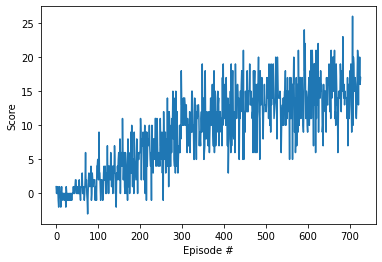

In [5]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Ideas for Future Work

No attempt has been made to optimize the model hyperparameters or to adjust the neural network model architecture. Future work would include experimenting with adjustments in these areas.

In addition, there are enhancements to the basic DQN that are likely to improve results and should be included in future work:

- Double DQN would mitigate the problem of overestimation of Q values that occurs particularly during the early stages of training.
- Prioritized experience replay would accelerate training by focusing on experiences from which more is likely to be learned.
- Dueling networks allow performance improvements by taking advantage of the fact that the value of most states doesn't vary across actions.